# <제주렌트카 가격예측 회귀 프로젝트>

## 1. 주제 선정

- 코로나 이슈 이후 제주도 렌트카 가격이 급증하고있다.
- 올 여름 제주여행에 대비해, 렌트카 가격을 미리 예측하여 가성비갑 여행을 해보자!
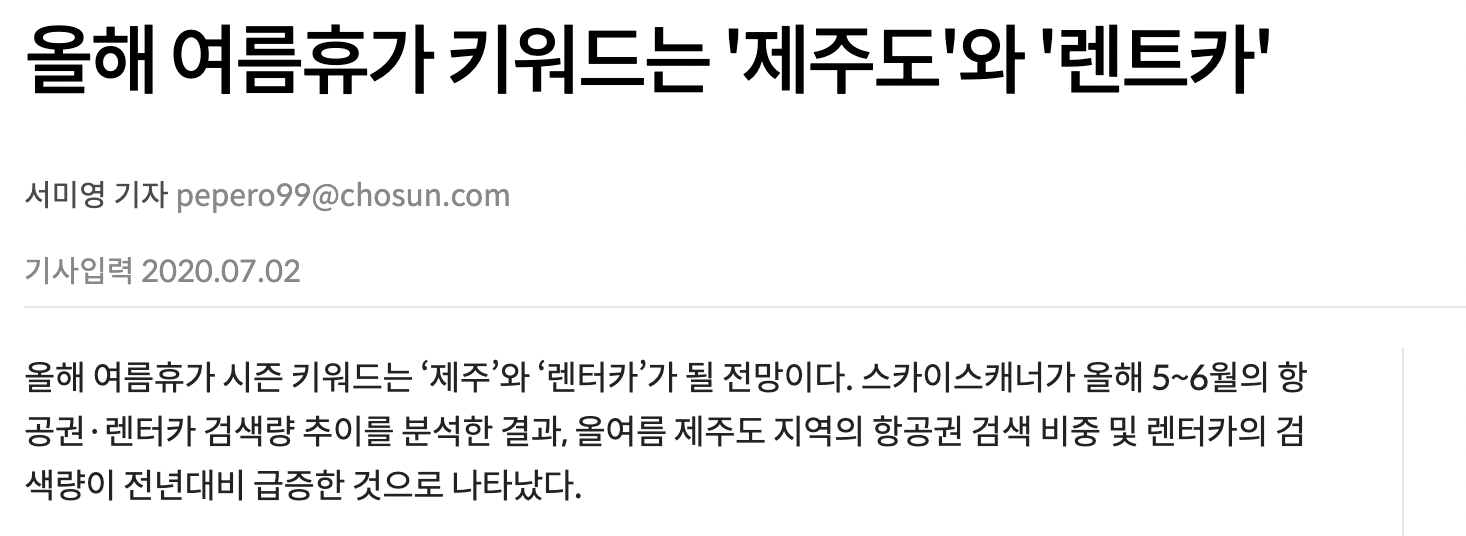
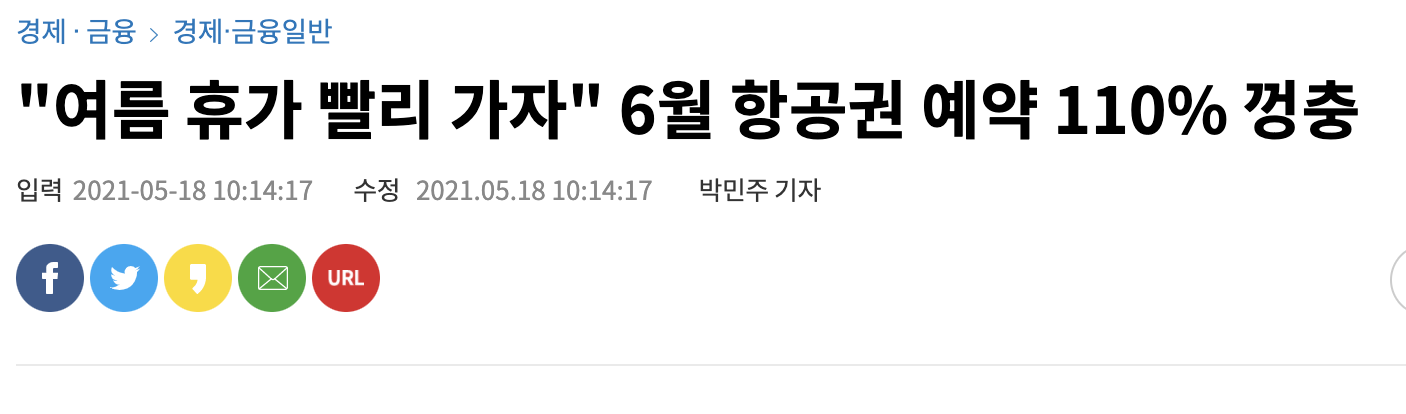

---

## 2. 데이터 설명

### 2-1. 데이터 출처
- 데이터 수집 사이트 : 제주패스랜트카
- 수집기간 : 6월~10월
- 수집방법 : 크롤링(selenium, bs4)

### 2-2. 주요 변수

### 1개의 row 데이터 도식화
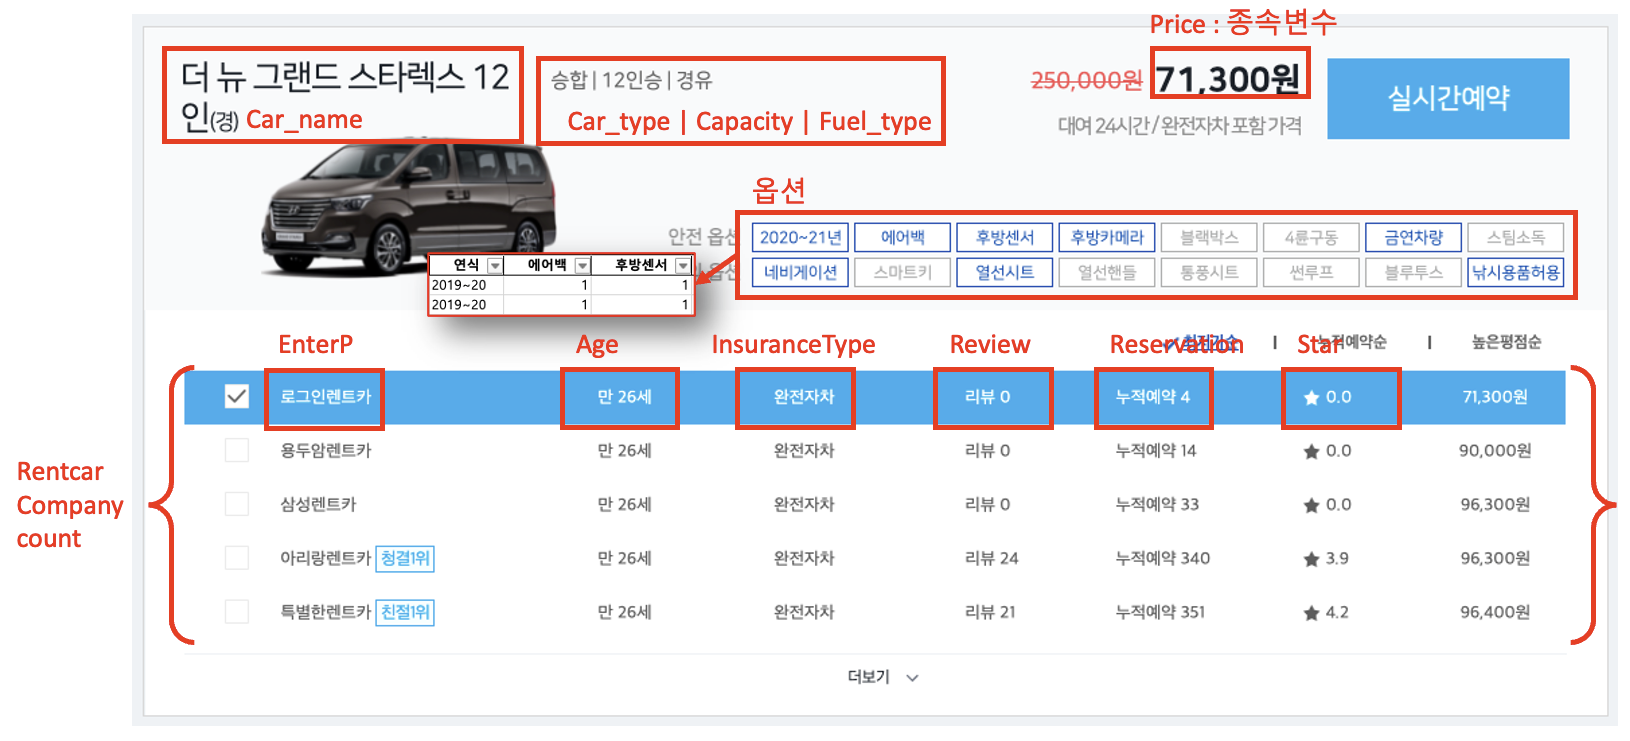
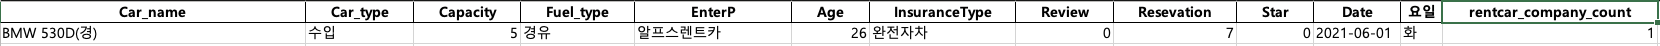

### 독립변수(17개)  / 주요 독립변수 : "차량가격"
- 모델명 | 세그먼트 | 수용인원 | 연료타입 | 제공업체 | 랜트가능 최소 연령 |
- 보험종류 | 리뷰수 | 누적예약수 | 별점 | 일자 | 요일 | 취급렌트카수 | 연식 |
- 옵션종류 | 월 | 차량가격


### 종속변수
- 하루 렌트 가격

---

In [5]:
# 전처리한 데이터셋 확인
jejurent_df

,Car_name,Car_type,Capacity,Fuel_type,EnterP,Age,InsuranceType,Review,Resevation,Star,Date,요일,rentcar_company_count,연식,옵션개수,Month,Car_price,Price,평일/휴일,성수기/비성수기
0,BMW 530D(경),수입,5,경유,알프스렌트카,26,완전자차,0,7,0.0,2021-06-01,화,1,2019,13,6,85000000,279600,평일,0
1,벤츠 E220D 카브리올레(경),수입,5,경유,예스렌트카,26,완전자차,2,20,3.1,2021-06-01,화,1,2019,9,6,80300000,472000,평일,0
2,제네시스 G90(휘),고급,5,휘발유,제주OK렌트카,26,부분무제한,0,7,0.0,2021-06-01,화,2,2019,10,6,79070000,320500,평일,0
3,BMW 430i 컨버터블(휘),수입,4,휘발유,제주다움렌트카,26,완전자차,1,27,5.0,2021-06-01,화,3,2020,9,6,76500000,378900,평일,0
4,테슬라모델3 퍼포먼스 EV(전기/충전비유료),수입,5,전기차,퍼시픽렌트카,26,슈퍼무제한,1,17,4.3,2021-06-01,화,1,2020,11,6,74790000,378000,평일,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,테슬라모델3 EV(전기/충전비유료),수입,5,전기차,퍼스트렌트카,26,완전자차,8,233,3.7,2021-10-30,토,1,2020,9,10,54790000,446100,휴일,0
21145,볼보 S90 (휘),수입,5,휘발유,퍼스트렌트카,26,완전자차,0,9,0.0,2021-10-30,토,1,2021,13,10,59490000,446100,휴일,0
21146,BMW 430i 컨버터블(휘),수입,4,휘발유,퍼스트렌트카,26,완전자차,3,24,4.8,2021-10-30,토,1,2020,11,10,76500000,531000,휴일,0
21147,BMW Z4 컨버터블 (휘),수입,2,휘발유,퍼스트렌트카,26,완전자차,1,5,4.6,2021-10-30,토,1,2021,9,10,66400000,531000,휴일,0


---

## 4. 데이터 탐색 (EDA)

### EDA에 앞서 가설을 세워보자.
* 가설1. 차량모델의 가격이 비쌀수록 렌트가격이 높을 것이다.
* 가설2. 성수기에는 평시에 비해 렌트가격이 더 비쌀 것이다.
* 가설3. 평일보다 휴일에 가격이 더 비쌀 것이다.
* 가설4. 부가옵션이 많이 붙은 차량일수록 가격이 비쌀 것이다.
* 가설5. 렌트가능나이가 낮을수록 렌트가격이 저렴할 것이다.
* 가설6. 연식이 오래된 모델일수록 렌트가격이 저렴할 것이다.
* 가설7. 취급업체가 많은 모델일수록 상대적으로 렌트가격이 저렴할 것이다.

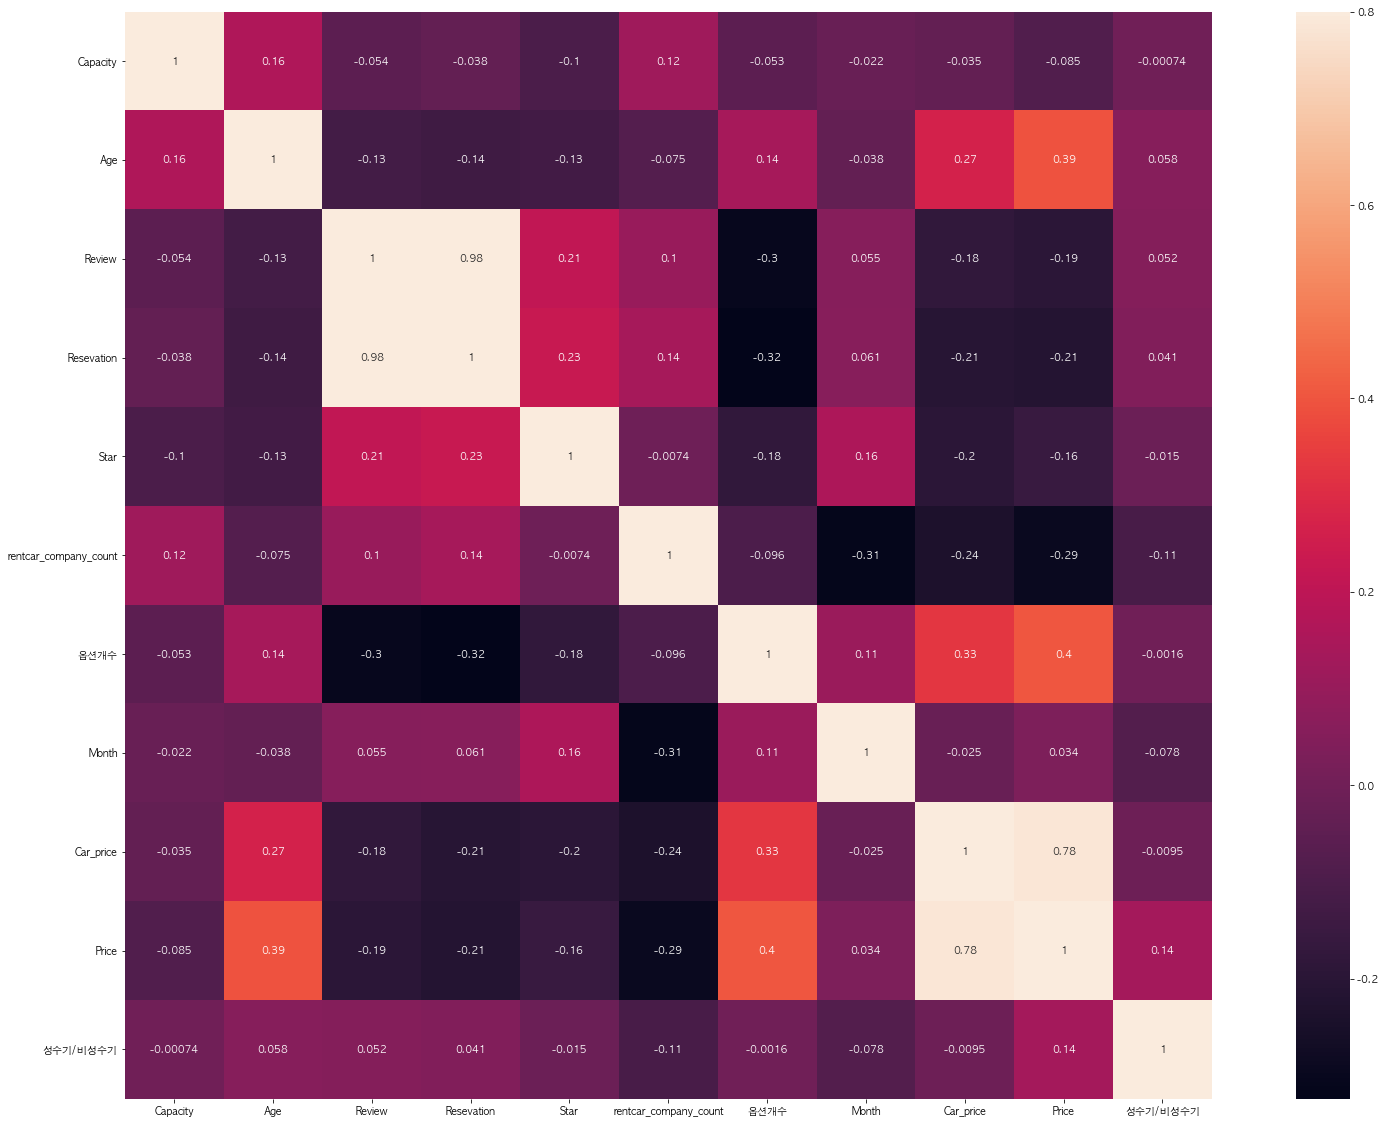

In [7]:
# 히트맵

corrmat = jejurent_df.corr() 
f, ax = plt.subplots(figsize=(30, 20)) 
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#### 히트맵



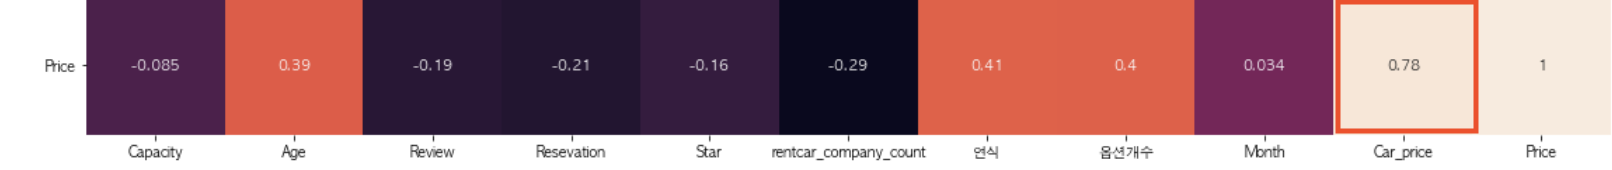

- 렌트가격과 상관관계가 가장 높은 요소는 차의 가격이었다.
- '-'상관관계가 가장 높은 것은 취급업체수. 취급업체수가 많아질수록 가격경쟁력을 위해 렌트가를 인하한다.

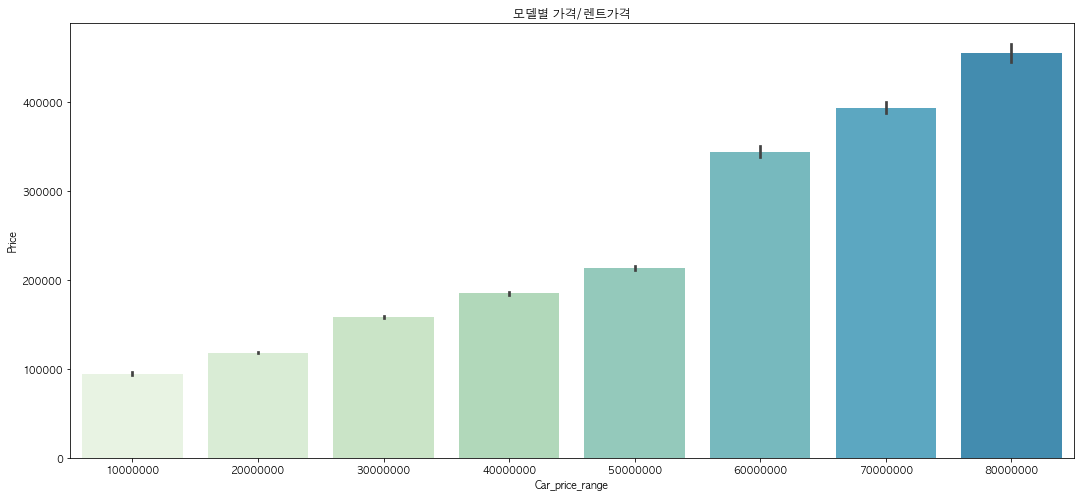

In [8]:
# 차량 가격대별 렌트가격
create_range_data(jejurent_df,'Car_price',0,85000000,10000000)

plt.figure(figsize=(18,8))
sns.barplot(x='Car_price_range',y='Price',data=jejurent_df,palette=sequential)
plt.title('모델별 가격/렌트가격')
plt.show()

drop_col(jejurent_df,'Car_price')

In [9]:
# 차의 가격과 렌트 가격은 정비례한다.

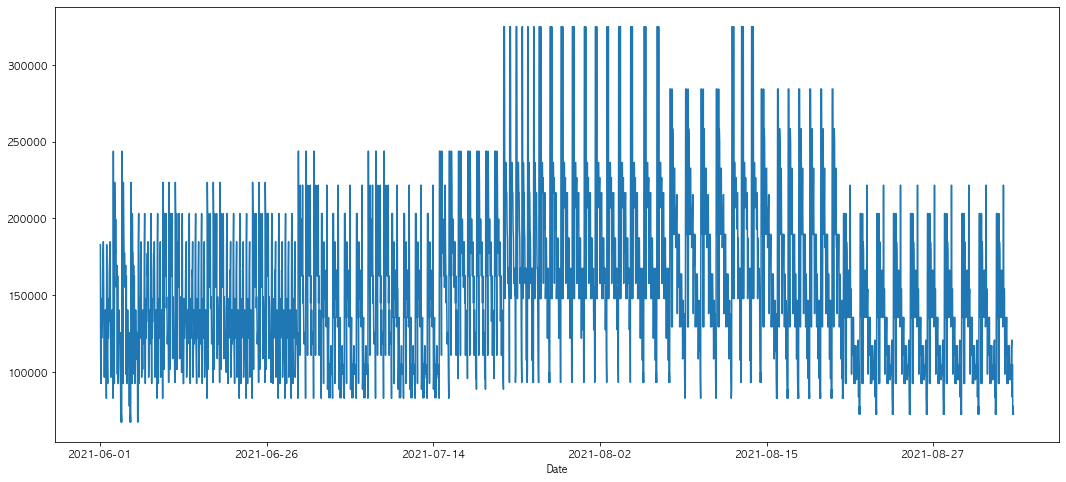

In [10]:
# 성수기 7/8월 성수기에는 렌트가격이 높게 형성된다.

first = jejurent_df[jejurent_df['EnterP'] == '특별한렌트카']

sonata = first[(first["Car_name"] == "K5")]
sonata['Date'] = pd.to_datetime(first['Date'])
first.index = first["Date"]
first.set_index('Date', inplace=True)

plt.figure(figsize=(18,8))
first["Price"].plot()
plt.grid
plt.show()

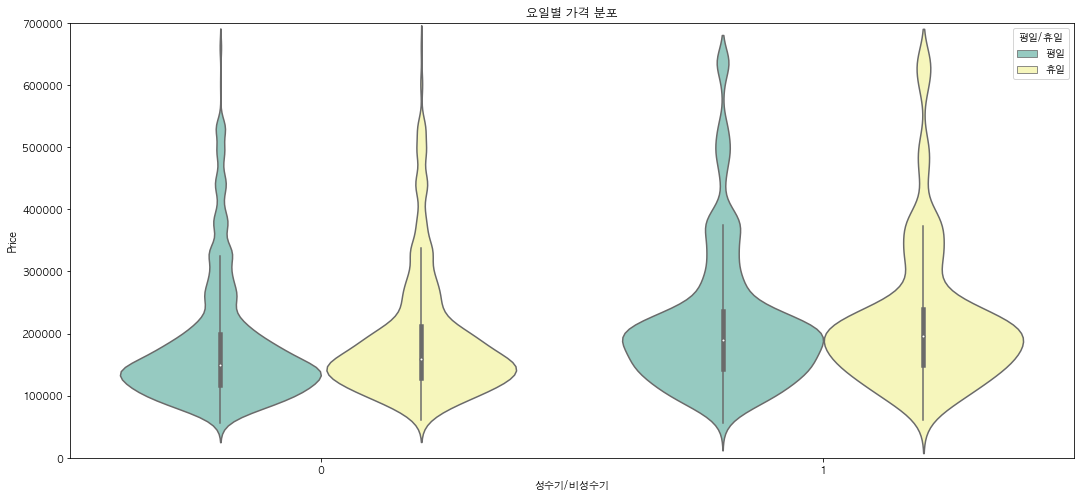

In [11]:
# 성수기 비성수기 가격 비교
# 성수기에는 비성수기보다 가격이 높게 형성된다.
# 평일과 휴일에 가격 차이는 크지 않지만, 휴일이 약간 더 비쌈.
plt.figure(figsize=(18,8))
sns.violinplot(x='성수기/비성수기',y='Price',data=jejurent_df,hue='평일/휴일',palette=categorical)
plt.title('성수기/비성수기 가격 분포')
plt.ylim(0,700000)
plt.show()

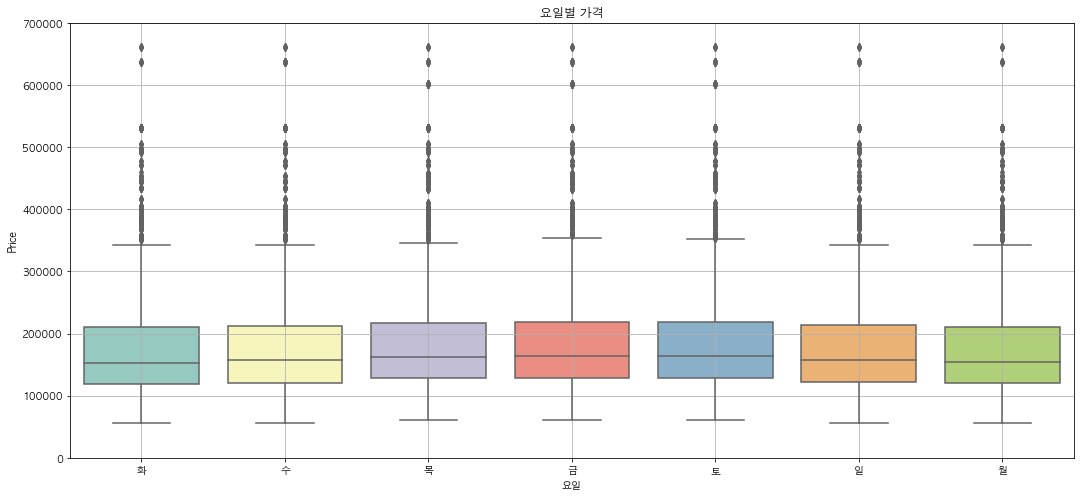

In [12]:
# 요일별 가격 -  요일별로 가격에 큰 차이는 보이지 않는다.
plt.figure(figsize=(18,8))
sns.boxplot(x='요일',y='Price',data=jejurent_df,palette=categorical)
plt.title('요일별 가격')
plt.ylim(0,700000)
plt.grid()
plt.show()

In [13]:
# 차종별 가격 분포

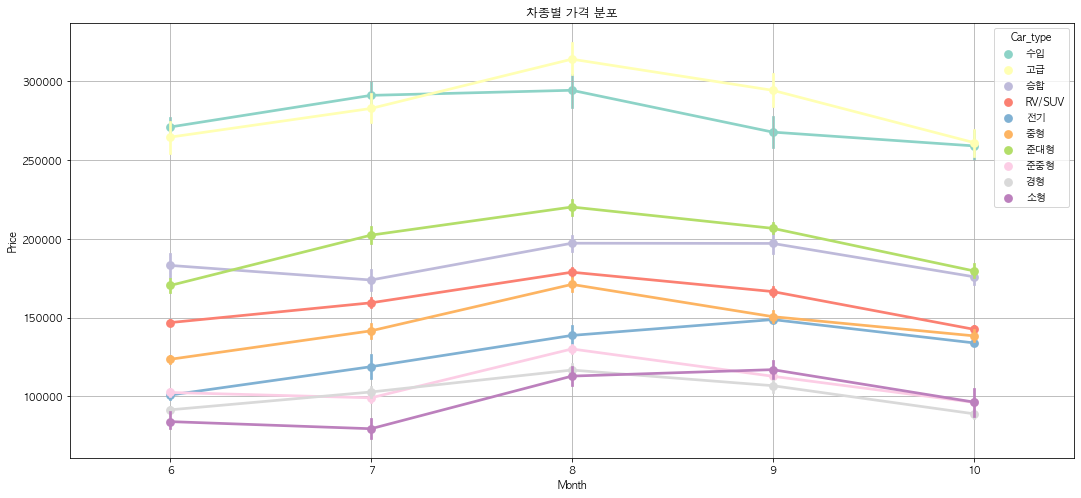

In [14]:
plt.figure(figsize=(18,8))
sns.pointplot(x='Month',y='Price',hue='Car_type', data=jejurent_df,palette=categorical)
plt.title("차종별 가격 분포")
plt.grid()
plt.show()

In [15]:
# 고급차와 수입차가 다른 차종에 비해 렌트가격이 전반적으로 높게 형성되어있음.
# 가장 성수기인 8월에는 가격이 오르는 모습을 보임

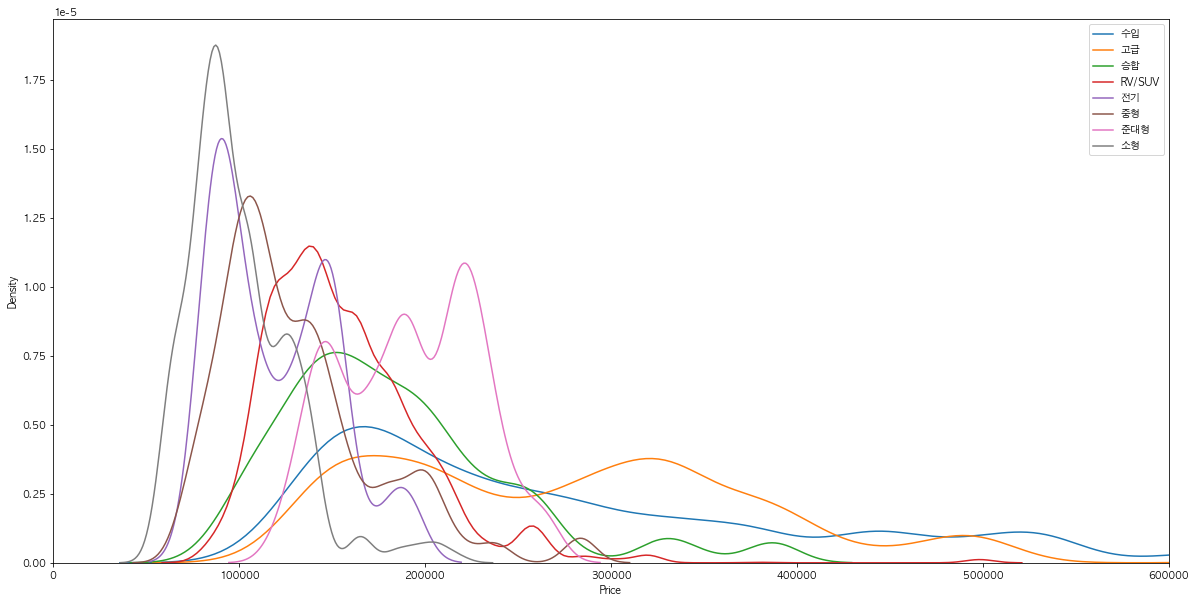

In [16]:
jejurent_df_type = jejurent_df.copy()
jejurent_df_type.loc[jejurent_df_type["Car_type"] == '경형', 'Car_type'] = "소형"
jejurent_df_type.loc[jejurent_df_type["Car_type"] == '준중형', 'Car_type'] = "중형"

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

tp = []
plt.figure(figsize=(20,10))
for ct in jejurent_df_type['Car_type'].unique():
    df = jejurent_df_type[jejurent_df_type['Car_type'] == ct]
    sns.distplot(df['Price'],bins=100,hist=False ,kde=True)
    tp.append(ct)
    plt.xlim(0,600000)
plt.legend(tp)
plt.show()

In [17]:
# 소형,중형,전기차는 대부분 20만원대 이내에 분포
# 승합차, 고급차, 수입차는 10-60만원대 이상까지 넓게 분포 

In [18]:
# 옵션갯수와 렌트 가격의 상관관계
jeju_model = jejurent_df.groupby('Car_name').mean()
jeju_model.sort_values(['옵션개수'],ascending=False).head(5)

,Capacity,Age,Review,Resevation,Star,rentcar_company_count,옵션개수,Month,Car_price,Price,성수기/비성수기
Car_name,,,,,,,,,,,
벤츠 E220D (경),5.0,26.0,0.0,8.000000,0.0,1.000000,14.0,6.681159,69200000.0,337613.043478,0.362319
제네시스 EQ900(휘),5.0,26.0,1.0,44.000000,5.0,1.000000,14.0,6.000000,73630000.0,426600.000000,0.000000
BMW 530D(경),5.0,26.0,0.0,7.000000,0.0,1.000000,13.0,6.681159,85000000.0,329791.304348,0.362319
볼보 S90 (휘),5.0,26.0,0.0,5.789474,0.0,1.453947,13.0,7.993421,59490000.0,447498.026316,0.230263
아우디 A5 스포트백(휘),5.0,26.0,0.0,7.000000,0.0,1.000000,13.0,6.681159,57010000.0,293813.043478,0.362319


#### 부가옵션의 갯수와 가격의 상관관계

1. 부가옵션갯수가 많은 차는 고급차 또는 수입차

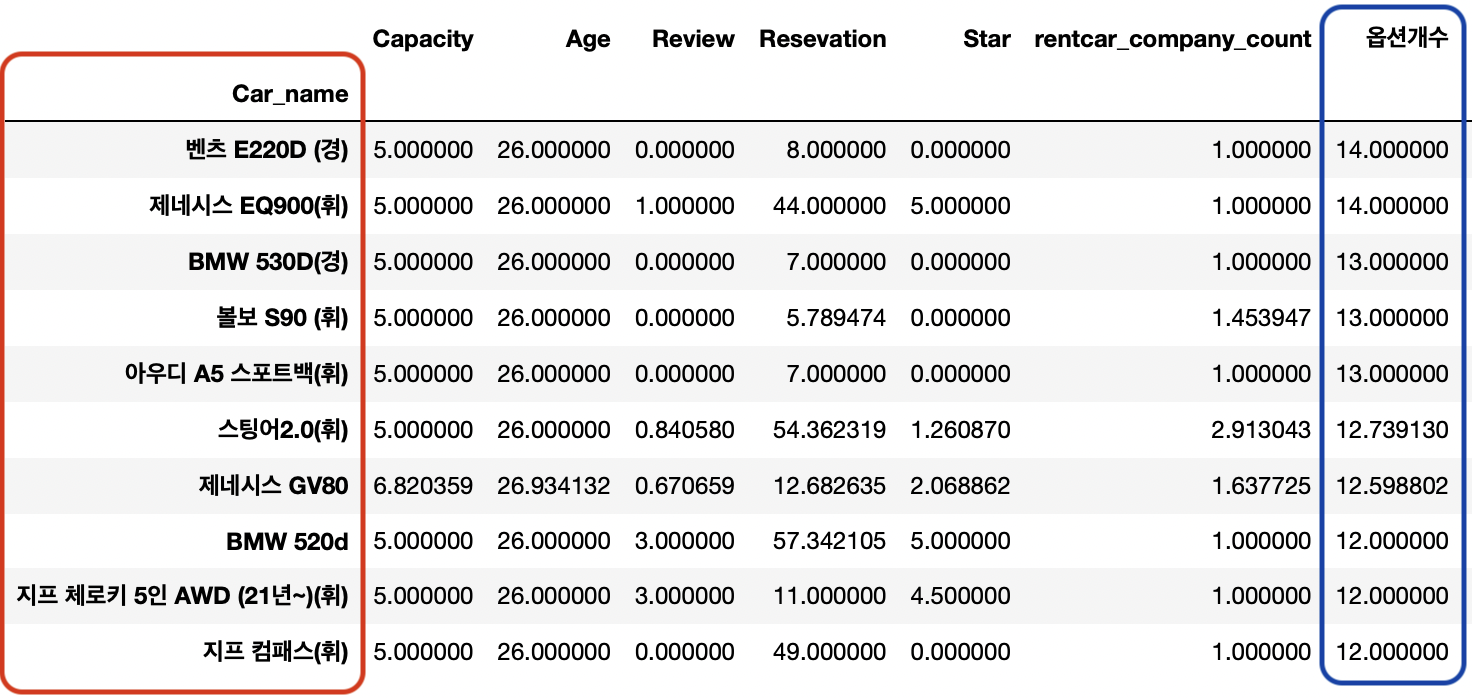


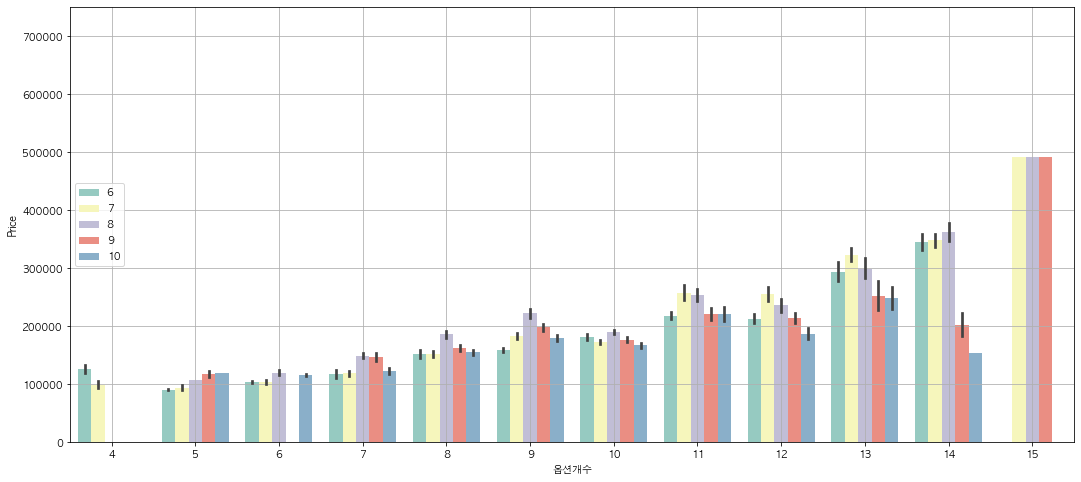

In [19]:
# 옵션갯수와 가격  boxplot

plt.figure(figsize=(18,8))
sns.barplot(x='옵션개수',y='Price',data=jejurent_df,hue='Month',palette=categorical)
plt.legend(loc='center left')
plt.ylim(0,750000)
plt.grid()
plt.show()

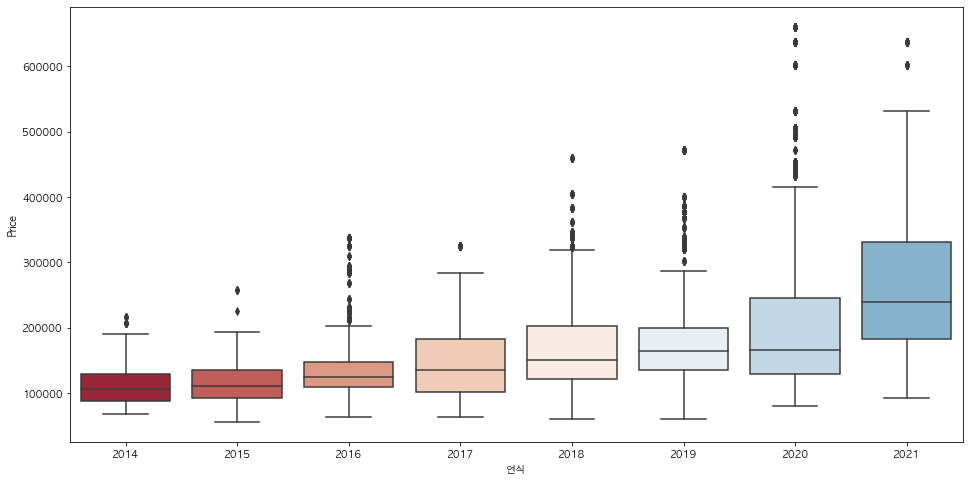

In [20]:
# 연식은 오래된 모델일수록 렌트가격이 저렴하다.
jejurent_df['연식']=jejurent_df['연식'].astype('int')

plt.figure(figsize=(16,8))
sns.boxplot(x='연식',y='Price', data=jejurent_df,palette=sbys)
plt.show()

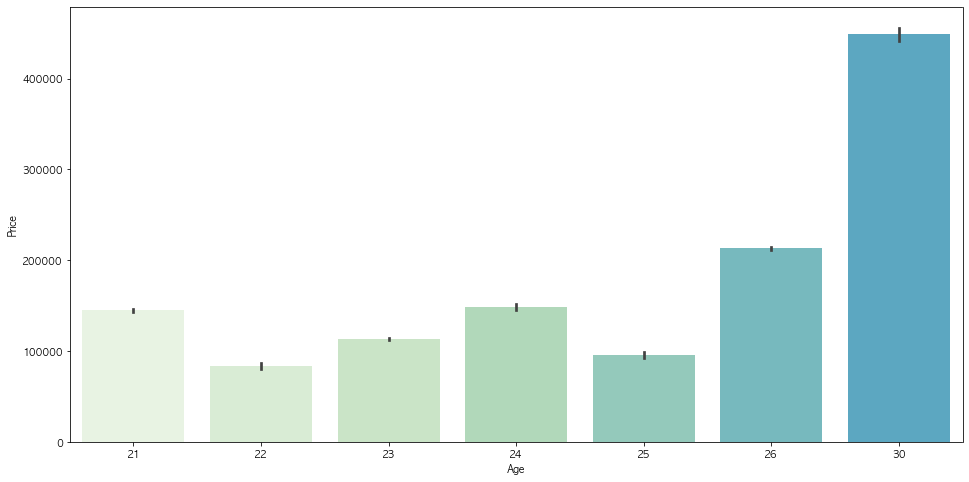

In [21]:
# 렌트가능 나이(Age)와 가격
plt.figure(figsize=(16,8))
sns.barplot(x='Age',y='Price', data=jejurent_df, palette=sequential)
plt.show()

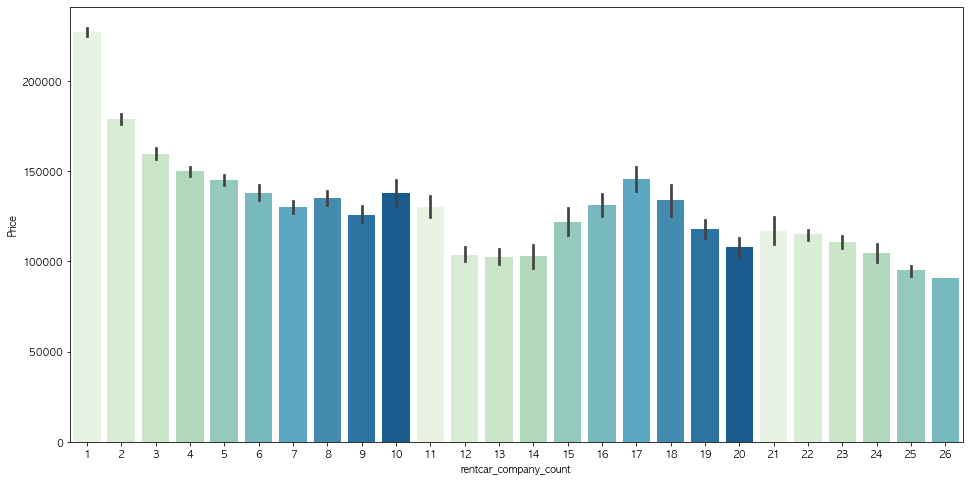

In [22]:
# 취급업체수가 많은 차량모델은 가격이 낮게 형성된다.
plt.figure(figsize=(16,8))
sns.barplot(x='rentcar_company_count',y='Price' \
            ,data=jejurent_df,palette=sequential)
plt.show()

### 데이터 탐색 요약
렌트가격의 형성에 아래 6가지 feature와 상관관계를 확인
- 차량 모델의 가격
- 성수기/비수기
- 차량의 모델 연식
- 차종
- 차량에 포함된 옵션갯수
- 차량의 취급업체 수

---

##  5.  가격예측 모델링

### 베이스라인 설정
EDA를 통해 확인한 주요 수치형 컬럼들만으로 모델링하여 베이스라인을 확인

- 차량 모델의 가격
- 성수기/비수기
- 차량의 모델 연식
- 차량에 포함된 옵션갯수
- 차량의 취급업체 수

In [23]:
# 데이터셋 만들기
jeju_df_bs = jejurent_df.copy()

base_dataset = jeju_df_bs[['Car_price','성수기/비성수기','연식','옵션개수','rentcar_company_count','Price']]

from sklearn.model_selection import train_test_split

x = base_dataset.drop(['Price'],axis=1)
y = base_dataset['Price'].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y,\
                                                    test_size=0.2, random_state=13)

In [24]:
# OLS
lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          4.148e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):                        0.00
Time:                        13:12:54   Log-Likelihood:                     -2.0992e+05
No. Observations:               16919   AIC:                                  4.198e+05
Df Residuals:                   16914   BIC:                                  4.199e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Car_price                 0.0046   3.12e-05    147.020      0.000       0.005       0.005
성수기/비성수기               3.291e+04   1114.332     29.532      0.000    3.07e+04    3.51e+04
연식                      -19.4835      1.259    -15.480      0.000     -21.951     -17.017
옵션개수                   8755.4720    260.901     33.559      0.000    8244.078    9266.866
rentcar_company_count -2904.7523    138.692    -20.944      0.000   -3176.604   -2632.901
==============================================================================
Omnibus:                     2962.718   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11074.292
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       6.582   Cond. No.                     8.69e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# 리니어리그레션 RMSE - test데이터의 rmse가 약 55500

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train,y_train)

pred_tr = lr.predict(x_train)
pred_test = lr.predict(x_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

print('RMSE of train :',rmse_tr)
print('RMSE of test :',rmse_test)

RMSE of train : 56562.88375021817
RMSE of test : 55530.531504669016


In [26]:
# 랜덤포레스트 리그레서 RMSE

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rr = RandomForestRegressor()
rr.fit(x_train,y_train)

predrr_tr = rr.predict(x_train) 
predrr_test = rr.predict(x_test)
mserr_tr = mean_squared_error(y_train,predrr_tr)
mserr_test = mean_squared_error(y_test,predrr_test)
rmserr_tr = np.sqrt(mean_squared_error(y_train,predrr_tr))
rmserr_test = np.sqrt(mean_squared_error(y_test,predrr_test))


# test데이터 예측치의 RMSE값이 약 17000원정도의 오차
print('MSE of train :',mserr_tr)
print('MSE of test :',mserr_test)
print('RMSE of train :',rmserr_tr)
print('RMSE of test :',rmserr_test)

MSE of train : 249469160.71877518
MSE of test : 279672602.3118724
RMSE of train : 15794.592768374092
RMSE of test : 16723.41479219697


#### 랜덤포레스트로 학습한 모델의 예측값의 RMSE값: 약 16000원 정도의 오차를 보임
- RMSE of Test: 16000을 베이스라인으로 설정하자!

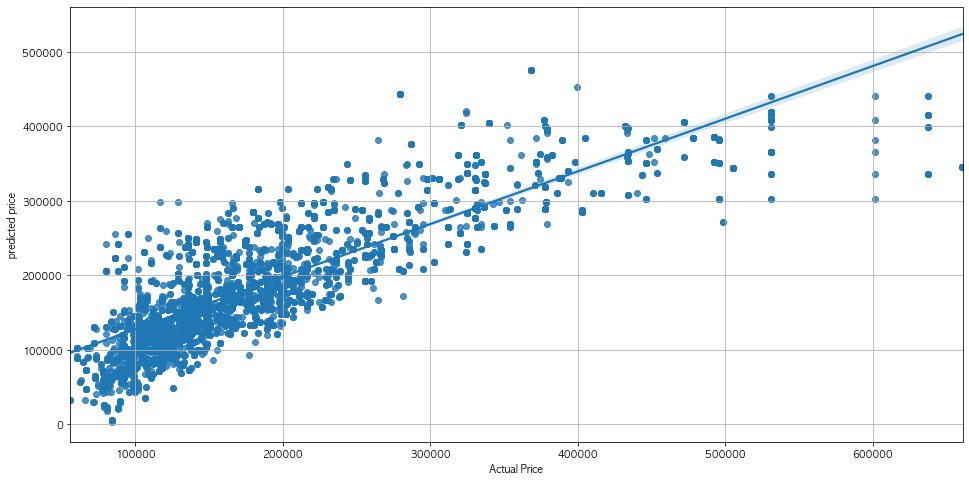

In [27]:
# test데이터의 실제값과 예측값 scatterplot
plt.figure(figsize=(16,8))
sns.regplot(y_test,pred_test,fit_reg=True)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.grid()
plt.show();

---

## 전체 데이터셋 활용


####  그전에!  우선  카테고리 데이터들을 수치형데이터로 처리해야!

### 모델의 가격예측성능을 높이기 위해 다음과 같은 방법으로 수치형데이터 전처리를 시도해보았다.
- 첫번째 시도1. 모든 범주형 데이터 더미변수화
- 두번째 시도2. 일부 컬럼 라벨 인코딩 + 범주형 데이터 더미변수화 
- 세번째 시도3. 일부 컬럼 카테고리임베딩 + 더미변수화

### 첫번째 시도1 : 모든 범주형 데이터 더미변수화 


##### dataframe
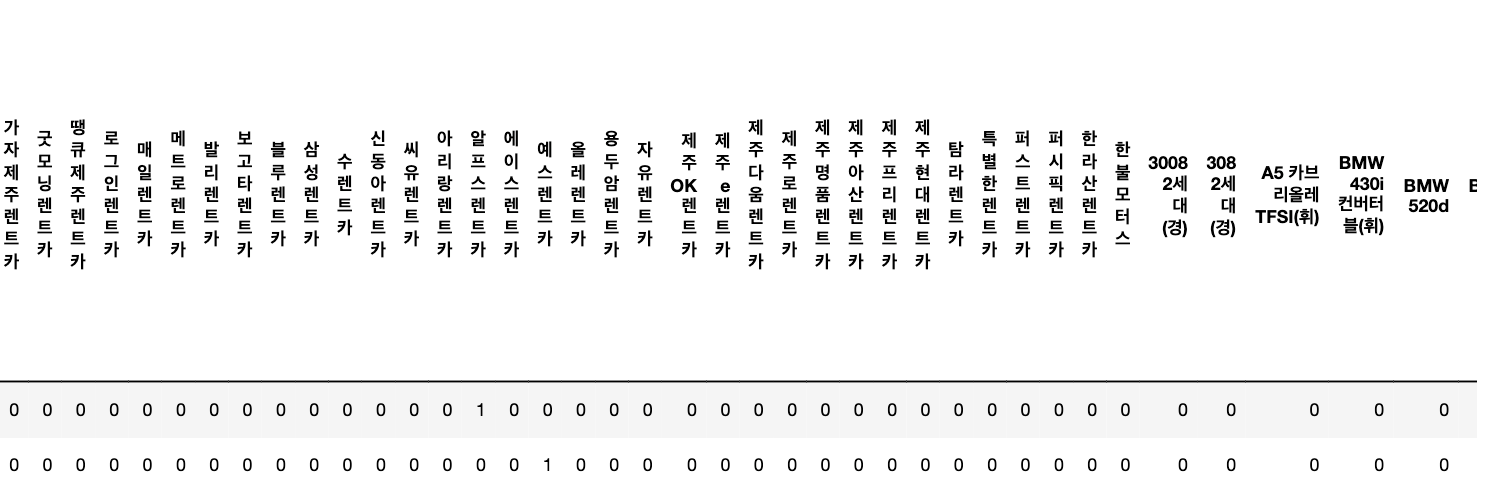
##### 컬럼이 180개..
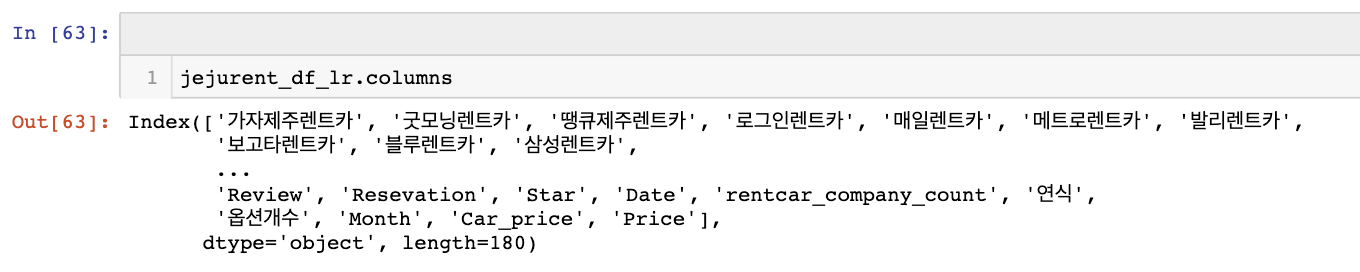

In [27]:
# 더미변수화

jejurent_df_lr = jejurent_df.copy()

categorical_cols = ['Car_type','요일','Fuel_type','InsuranceType', '평일/휴일','성수기/비성수기','Car_name', "EnterP"]

for categorical_col in categorical_cols:
    jejurent_df_lr = pd.concat([pd.get_dummies(jejurent_df_lr[categorical_col]) 
                                  ,jejurent_df_lr.drop(columns=categorical_col)], axis=1)
    
# 일자 삭제
jejurent_df_lr
jejurent_df_lr.drop(columns=["Date"], inplace=True)

# 데이터 나누기
from sklearn.model_selection import train_test_split


x = jejurent_df_lr.drop(['Price'], axis=1)
y = jejurent_df_lr['Price'].astype(float)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [28]:
jejurent_df_lr

,가자제주렌트카,굿모닝렌트카,땡큐제주렌트카,로그인렌트카,매일렌트카,메트로렌트카,발리렌트카,보고타렌트카,블루렌트카,삼성렌트카,수렌트카,신동아렌트카,씨유렌트카,아리랑렌트카,알프스렌트카,에이스렌트카,예스렌트카,올레렌트카,용두암렌트카,자유렌트카,제주OK렌트카,제주e렌트카,제주다움렌트카,제주로렌트카,제주명품렌트카,제주아산렌트카,제주프리렌트카,제주현대렌트카,탐라렌트카,특별한렌트카,퍼스트렌트카,퍼시픽렌트카,한라산렌트카,한불모터스,3008 2세대(경),308 2세대(경),A5 카브리올레 TFSI(휘),BMW 430i 컨버터블(휘),BMW 520d,BMW 520i,BMW 530D(경),BMW X1 (휘),BMW Z4 컨버터블 (휘),BMW i3(18년~)(전기/충전비유료),CLIO(경),DS3 크로스백(경),DS7 크로스백(경),G70,K3,K5,K7,K8,K9,QM3(경),QM6,SM3,SM3 ev,SM6,XM3(20년~)(휘),i30,그랜저,니로,니로 ev,더 뉴 트랙스(휘),레이,렉스턴,말리부,모닝,모하비,미니 쿠퍼 5도어(휘),미니 쿠퍼 컨버터블,미니 쿠퍼 컨버터블JCW,미니 쿠퍼 컨버터블S,미니 쿠퍼 컨트리맨,베뉴(휘),벤츠 C200 카브리올레(휘),벤츠 E220D (경),벤츠 E220D 카브리올레(경),벤츠 GLB 250 7인(휘),벤츠 뉴 SLK-클래스 컨버터블(휘),볼보 S90 (휘),볼보 XC40 AWD (21년~)(휘),볼보 XC60(휘),볼트 EV(전기/충전비유료),셀토스,스타렉스,스토닉,스팅어2.0(휘),스팅어3.3(휘),스파크,스포티지,시트로엥 C3 에어크로스(경),시트로엥 C4 칵투스(경),시트로엥 C5 에어크로스(경),시트로엥 그랜드 C4 스페이스 투어러 (경),시트로엥 그랜드 C4 피카소(휘),싼타페,쏘나타,쏘렌토,쏘울,쏘울 ev,쏠라티 15인(경),아반떼,아우디 A5 스포트백(휘),아이오닉,아이오닉 ev,엑센트,올 뉴 SM7(LPG),올 뉴 크루즈(휘),올란도,제네시스 EQ900(휘),제네시스 G80,제네시스 G90(휘),제네시스 GV70,제네시스 GV80,지프 랭글러 4도어(휘),지프 레니게이드(휘),지프 체로키 5인 AWD (21년~)(휘),지프 컴패스(휘),카니발,카니발 리무진,카니발 하이리무진,코나,코나 ev,코란도,코란도 투리스모 9인(경),테슬라모델3 EV(전기/충전비유료),테슬라모델3 퍼포먼스 EV(전기/충전비유료),투싼,트래버스 7인(휘),트레일블레이저,티볼리,팰리세이드,포드 머스탱 컨버터블(휘),폭스바겐 더 올 뉴 제타 (21년~)(휘),푸조 2008,푸조 5008(경),푸조 508(경),푸조 e2008,0,1,평일,휴일,부분무제한,슈퍼무제한,완전자차,LPG,경유,전기차,하이브리드,휘발유,금,목,수,월,일,토,화,RV/SUV,경형,고급,소형,수입,승합,전기,준대형,준중형,중형,Capacity,Age,Review,Resevation,Star,rentcar_company_count,연식,옵션개수,Month,Car_price,Price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,26,0,7,0.0,1,2019,13,6,85000000,279600
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,26,2,20,3.1,1,2019,9,6,80300000,472000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,5,26,0,7,0.0,2,2019,10,6,79070000,320500
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4,26,1,27,5.0,3,2020,9,6,76500000,378900
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,26,1,17,4.3,1,2020,11,6,74790000,378000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [29]:
# statsmodel OLS summary 
# R-squard 수치가 0.933으로 매우 양호
# 컨디션넘버가 높은 것이 신경 쓰임. -> 컬럼의 갯수가 너무 많아서 생긴 문제일까?

lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1478.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:43:42   Log-Likelihood:            -1.9638e+05
No. Observations:               16919   AIC:                         3.931e+05
Df Residuals:                   16761   BIC:                         3.943e+05
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
가자제주렌트카                  -1.365e+05   6983.364    -19.550      0.000    -1.5e+05   -1.23e+05
굿모닝렌트카                    -7.93e+04   9291.317     -8.535      0.000   -9.75e+04   -6.11e+04
땡큐제주렌트카                  -1.149e+05   6709.548    -17.129      0.000   -1.28e+05   -1.02e+05
로그인렌트카                   -8.356e+04   6894.518    -12.120      0.000   -9.71e+04      -7e+04
매일렌트카                    -1.356e+05   6432.767    -21.072      0.000   -1.48e+05   -1.23e+05
메트로렌트카                   -1.442e+05   9063.175    -15.907      0.000   -1.62e+05   -1.26e+05
발리렌트카                    -1.101e+05   7298.622    -15.089      0.000   -1.24e+05   -9.58e+04
보고타렌트카                   -1.311e+05   7737.999    -16.945      0.000   -1.46e+05   -1.16e+05
블루렌트카                    -1.923e+05   1.35e+04    -14.296      0.000   -2.19e+05   -1.66e+05
삼성렌트카                    -1.266e+05   6987.057    -18.116      0.000    -1.4e+05   -1.13e+05
수렌트카                     -1.131e+05   7003.091    -16.145      0.000   -1.27e+05   -9.93e+04
신동아렌트카                   -8.506e+04   7165.995    -11.870      0.000   -9.91e+04    -7.1e+04
씨유렌트카                    -1.256e+05   6816.939    -18.421      0.000   -1.39e+05   -1.12e+05
아리랑렌트카                    2.804e+04   9296.033      3.016      0.003    9817.354    4.63e+04
알프스렌트카                   -1.132e+05   6685.269    -16.932      0.000   -1.26e+05      -1e+05
에이스렌트카                   -1.268e+05   6831.922    -18.559      0.000    -1.4e+05   -1.13e+05
예스렌트카                    -4.755e+04   7194.361     -6.609      0.000   -6.17e+04   -3.34e+04
올레렌트카                    -1.212e+05   7322.394    -16.556      0.000   -1.36e+05   -1.07e+05
용두암렌트카                   -1.117e+05   6857.228    -16.294      0.000   -1.25e+05   -9.83e+04
자유렌트카                    -7.295e+04   6739.304    -10.825      0.000   -8.62e+04   -5.97e+04
제주OK렌트카                  -1.501e+05   6913.634    -21.705      0.000   -1.64e+05   -1.37e+05
제주e렌트카                   -1.151e+05   6529.699    -17.635      0.000   -1.28e+05   -1.02e+05
제주다움렌트카                  -1.433e+05   6978.591    -20.528      0.000   -1.57e+05    -1.3e+05
제주로렌트카                   -1.595e+05   6542.157    -24.385      0.000   -1.72e+05   -1.47e+05
제주명품렌트카                  -1.472e+05   1.02e+04    -14.415      0.000   -1.67e+05   -1.27e+05
제주아산렌트카                   -9.41e+04   7043.434    -13.359      0.000   -1.08e+05   -8.03e+04
제주프리렌트카                  -1.164e+05   1.03e+04    -11.308      0.000   -1.37e+05   -9.62e+04
제주현대렌트카                  -1.714e+05   7031.628    -24.383      0.000   -1.85e+05   -1.58e+05
탐라렌트카                    -1.274e+05   6771.434    -18.815      0.000   -1.41e+05   -1.14e+05
특별한렌트카                   -1.306e+05   6697.836    -19.499      0.000   -1.44e+05   -1.17e+05
퍼스트렌트카        

In [ ]:
# 리니어리그레션 RMSE - test데이터의 rmse가 약 26700

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train,y_train)

pred_tr = lr.predict(x_train)
pred_test = lr.predict(x_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

print('RMSE of train :',rmse_tr)
print('RMSE of test :',rmse_test)

In [30]:
# 랜덤포레스트 리그레서 RMSE

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rr = RandomForestRegressor()
rr.fit(x_train,y_train)

predrr_tr = rr.predict(x_train) 
predrr_test = rr.predict(x_test)
mserr_tr = mean_squared_error(y_train,predrr_tr)
mserr_test = mean_squared_error(y_test,predrr_test)
rmserr_tr = np.sqrt(mean_squared_error(y_train,predrr_tr))
rmserr_test = np.sqrt(mean_squared_error(y_test,predrr_test))


print('MSE of train :',mserr_tr)
print('MSE of test :',mserr_test)
print('RMSE of train :',rmserr_tr)
print('RMSE of test :',rmserr_test)

MSE of train : 54448122.58960816
MSE of test : 136142736.78561038
RMSE of train : 7378.8971120085525
RMSE of test : 11668.021973994151


In [ ]:
# test데이터의 rmse값이 10000원초반대로 매우 낮아짐

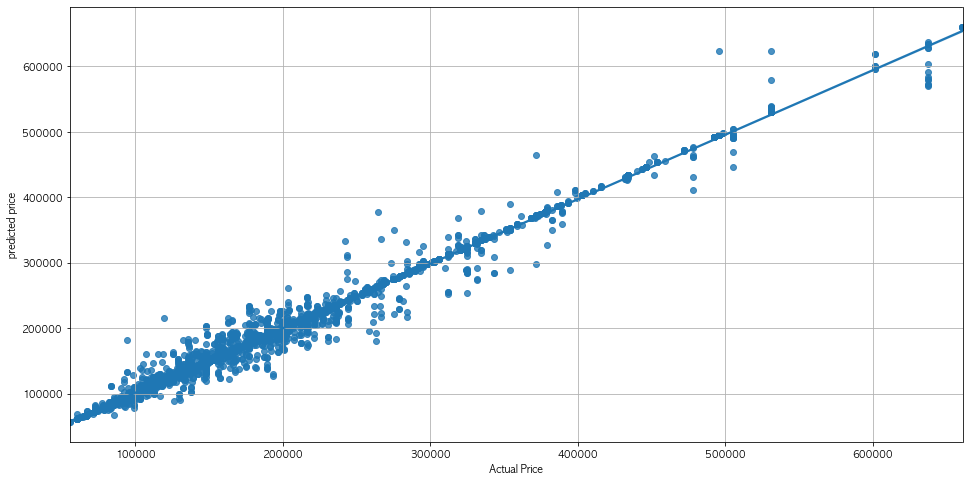

In [32]:
# test데이터의 실제값과 예측값 scatterplot
plt.figure(figsize=(16,8))
sns.regplot(y_test,predrr_test,fit_reg=True)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.grid()
plt.show();

In [57]:
# 이상치 분석
# 회귀선에 멀찍이 떨어져 예측치와 실제값의 차이가 많이나는 컬럼을 추려보자.
outlier_df = pd.DataFrame({"pred":predrr_test, "y_test":y_test, '모델명':jejurent_df["Car_name"].loc[y_test.index], 
                         '차종':jejurent_df['Car_type'].loc[y_test.index],"렌트카 업체":jejurent_df["EnterP"].loc[y_test.index] ,"값 차이":abs(predrr_test-y_test),"날짜":jejurent_df["Date"].loc[y_test.index]})
outlier_df[outlier_df['값 차이']>=90000]

,pred,y_test,모델명,차종,렌트카 업체,값 차이,날짜
12582,623376.300000,495600,볼보 S90 (휘),수입,퍼스트렌트카,127776.300000,2021-08-16
6,378194.000000,264400,BMW 520d,수입,퍼스트렌트카,113794.000000,2021-06-01
12575,632598.000000,531000,BMW 430i 컨버터블(휘),수입,퍼스트렌트카,101598.000000,2021-08-16
15492,217589.005159,119100,K5,중형,매일렌트카,98489.005159,2021-09-10
12820,468838.100000,371700,제네시스 GV80,고급,퍼스트렌트카,97138.100000,2021-08-18


In [ ]:
# 대부분 수입차 또는 고급차임을 알 수 있음.

### 두번째 시도 2 : 일부 컬럼 라벨 인코딩 + 범주형 데이터 더미변수화 
- "Car_name", "EnterP" 컬럼의 경우 unique한 값이 너무 많아서 더미변수화했을 때, 컬럼의 갯수가 너무 많아지는 문제가 발생.
- 컬럼갯수가 너무 많아 모델링에 있어 Over Fitting이 우려되었기에, 일부 컬럼의 경우 데이터간 위계의 발생문제를 사전에 감안하고 라벨인코딩을 진행함.

#### 라벨인코딩 컬럼 선정 
- "Car_name", "EnterP"

#### 더미 변수화
- 'Fuel_type','InsuranceType', '평일/휴일','요일', 'Car_type'

In [41]:
# 라벨 인코딩

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()




jejurent_df_lr_label = jejurent_df.copy()
#jejurent_df_lr_label.drop(columns="Car_price", axis=1, inplace=True)

categorical_cols = ['EnterP','Car_name']


for categorical_col in categorical_cols:
    jejurent_df_lr_label[f'{categorical_col}_le'] = le.fit_transform(jejurent_df_lr_label[categorical_col])
    jejurent_df_lr_label = jejurent_df_lr_label.drop(columns=[categorical_col],axis=1)

In [42]:
# 더미변수화

categorical_cols = ['Fuel_type','InsuranceType', '평일/휴일','성수기/비성수기',"요일", 'Car_type']


for categorical_col in categorical_cols:
    jejurent_df_lr_label = pd.concat([pd.get_dummies(jejurent_df_lr_label[categorical_col]) 
                                  ,jejurent_df_lr_label.drop(columns=categorical_col)], axis=1)

In [43]:
# 일자 삭제
jejurent_df_lr_label
jejurent_df_lr_label.drop(columns=["Date"], inplace=True)

In [44]:
# 데이터 나누기
from sklearn.model_selection import train_test_split


x = jejurent_df_lr_label.drop(['Price'], axis=1).astype(float)
y = jejurent_df_lr_label['Price'].astype(float)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [45]:
jejurent_df_lr_label

,RV/SUV,경형,고급,소형,수입,승합,전기,준대형,준중형,중형,금,목,수,월,일,토,화,0,1,평일,휴일,부분무제한,슈퍼무제한,완전자차,LPG,경유,전기차,하이브리드,휘발유,Capacity,Age,Review,Resevation,Star,rentcar_company_count,연식,옵션개수,Month,Car_price,Price,EnterP_le,Car_name_le
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,5,26,0,7,0.0,1,2019,13,6,85000000,279600,14,6
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,5,26,2,20,3.1,1,2019,9,6,80300000,472000,16,43
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,5,26,0,7,0.0,2,2019,10,6,79070000,320500,20,78
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,4,26,1,27,5.0,3,2020,9,6,76500000,378900,22,3
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,5,26,1,17,4.3,1,2020,11,6,74790000,378000,31,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,5,26,8,233,3.7,1,2020,9,10,54790000,446100,30,92
21145,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,5,26,0,9,0.0,1,2021,13,10,59490000,446100,30,46
21146,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,4,26,3,24,4.8,1,2020,11,10,76500000,531000,30,3
21147,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,2,26,1,5,4.6,1,2021,9,10,66400000,531000,30,8


In [46]:
# statsmodel OLS summary 
# 컨디션넘버가 낮아졌지만, R-squared값도 하락

lm = sm.OLS(y_train.astype(float), x_train.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1794.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:52:37   Log-Likelihood:            -2.0608e+05
No. Observations:               16919   AIC:                         4.122e+05
Df Residuals:                   16883   BIC:                         4.125e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
RV/SUV                -1.226e+06   3.01e+04    -40.688      0.000   -1.29e+06   -1.17e+06
경형                    -1.211e+06   3.01e+04    -40.280      0.000   -1.27e+06   -1.15e+06
고급                    -1.235e+06   3.02e+04    -40.948      0.000   -1.29e+06   -1.18e+06
소형                    -1.201e+06   3.02e+04    -39.747      0.000   -1.26e+06   -1.14e+06
수입                    -1.226e+06   3.06e+04    -40.057      0.000   -1.29e+06   -1.17e+06
승합                    -1.228e+06   3.03e+04    -40.511      0.000   -1.29e+06   -1.17e+06
전기                    -1.291e+06   3.03e+04    -42.683      0.000   -1.35e+06   -1.23e+06
준대형                   -1.227e+06   3.02e+04    -40.658      0.000   -1.29e+06   -1.17e+06
준중형                   -1.214e+06      3e+04    -40.490      0.000   -1.27e+06   -1.16e+06
중형                    -1.231e+06   3.03e+04    -40.675      0.000   -1.29e+06   -1.17e+06
금                     -1.767e+06   4.31e+04    -40.993      0.000   -1.85e+06   -1.68e+06
목                     -1.744e+06   4.31e+04    -40.472      0.000   -1.83e+06   -1.66e+06
수                     -1.752e+06   4.31e+04    -40.644      0.000   -1.84e+06   -1.67e+06
월                     -1.754e+06   4.31e+04    -40.697      0.000   -1.84e+06   -1.67e+06
일                     -1.752e+06   4.31e+04    -40.638      0.000   -1.84e+06   -1.67e+06
토                     -1.768e+06   4.31e+04    -41.025      0.000   -1.85e+06   -1.68e+06
화                     -1.754e+06   4.31e+04    -40.693      0.000   -1.84e+06   -1.67e+06
0                     -6.162e+06   1.51e+05    -40.869      0.000   -6.46e+06   -5.87e+06
1                     -6.129e+06   1.51e+05    -40.649      0.000   -6.42e+06   -5.83e+06
평일                    -6.158e+06   1.51e+05    -40.842      0.000   -6.45e+06   -5.86e+06
휴일                    -6.134e+06   1.51e+05    -40.673      0.000   -6.43e+06   -5.84e+06
부분무제한                 -4.112e+06      1e+05    -40.988      0.000   -4.31e+06   -3.92e+06
슈퍼무제한                 -4.078e+06   1.01e+05    -40.479      0.000   -4.28e+06   -3.88e+06
완전자차                  -4.102e+06   1.01e+05    -40.803      0.000    -4.3e+06    -3.9e+06
LPG                   -2.442e+06   6.03e+04    -40.498      0.000   -2.56e+06   -2.32e+06
경유                     -2.46e+06   6.03e+04    -40.818      0.000   -2.58e+06   -2.34e+06
전기차                   -2.506e+06   6.06e+04    -41.372      0.000   -2.62e+06   -2.39e+06
하이브리드                  -2.44e+06   6.01e+04    -40.593      0.000   -2.56e+06   -2.32e+06
휘발유                   -2.443e+06   6.05e+04    -40.411      0.000   -2.56e+06   -2.32e+06
Capacity               -604.5732    478.430     -1.264      0.206   -1542.345     333.199
Age                    1.148e+04    245.836     46.686      0.000     1.1e+04     1.2e+04
Review                 

In [47]:
# 리니어리그레션 RMSE 
# 단순히 더미변수화했을 때보다 RMSE값이 크게 떨어졌다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train,y_train)

pred_tr = lr.predict(x_train)
pred_test = lr.predict(x_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

print('RMSE of train :',rmse_tr)
print('RMSE of test :',rmse_test)

RMSE of train : 47168.9639096087
RMSE of test : 45884.44564406614


In [48]:
# 랜덤포레스트 리그레서 RMSE

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



rr = RandomForestRegressor()
rr.fit(x_train,y_train)

predrr_tr = rr.predict(x_train) 
predrr_test = rr.predict(x_test)
mserr_tr = mean_squared_error(y_train,predrr_tr)
mserr_test = mean_squared_error(y_test,predrr_test)
rmserr_tr = np.sqrt(mean_squared_error(y_train,predrr_tr))
rmserr_test = np.sqrt(mean_squared_error(y_test,predrr_test))

print('MSE of train :',mserr_tr)
print('MSE of test :',mserr_test)
print('RMSE of train :',rmserr_tr)
print('RMSE of test :',rmserr_test)

MSE of train : 54550715.81946417
MSE of test : 134238512.3456735
RMSE of train : 7385.845640105415
RMSE of test : 11586.134486776575


### K-Fold로 교차검증

In [49]:
# K-Fold= 5
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

kfold =KFold(n_splits=5)
rf_cv = RandomForestRegressor()

# k-fold=5로 cross validation의 rmse값의 평균값 출력
cv_rmse = []
for train_idx, test_idx in kfold.split(x):
    x_train_cv, x_test_cv = x.iloc[train_idx], x.iloc[test_idx] 
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    rf_cv.fit(x_train_cv,y_train_cv)
    pred_cv = rf_cv.predict(x_test_cv) 
    
    cv_rmse.append(np.sqrt(mean_squared_error(y_test_cv,pred_cv)))
    
print("cv_rmse : ", cv_rmse, end="\n")
print("cv_rmse_avg :",np.mean(cv_rmse))

cv_rmse :  [11823.147750024658, 23222.38593124356, 35213.191847925475, 23541.66932410497, 24185.23807694114]
cv_rmse_avg : 23597.12658604796


### 세번째 시도 3 : 카테고리 임베딩 + 더미변수화

- 'Car_name' : Car_price로 대체 (Car_name 컬럼을 drop)
#### 카테고리 임베딩
- 'EnterP' : 랜터카 회사가 받은 별점의 평균을 'EnterP'로 대체한다.
#### 더미 변수화
- 'Car_type','요일','Fuel_type','InsuranceType', '평일/휴일'

In [51]:

jejurent_df_lr_ca = jejurent_df.copy()


#EnterP ==> 카테고리 임베딩(star)
ES_df = jejurent_df_lr_ca.groupby("EnterP").mean("star").reset_index()
for i in range(len(jejurent_df_lr_ca)):
    jejurent_df_lr_ca["EnterP"][i] = float(ES_df[ES_df["EnterP"]==jejurent_df_lr_ca["EnterP"][i]]["Star"])


    
# 더미변수화
categorical_cols = ['Car_type','요일','Fuel_type','InsuranceType', '평일/휴일','성수기/비성수기']

for categorical_col in categorical_cols:
    jejurent_df_lr_ca = pd.concat([pd.get_dummies(jejurent_df_lr_ca[categorical_col]) 
                                  ,jejurent_df_lr_ca.drop(columns=categorical_col)], axis=1)


# 데이터 나누기

from sklearn.model_selection import train_test_split


x = jejurent_df_lr_ca.drop(columns=['Price','Car_name','Date'], axis=1).astype(float)
y = jejurent_df_lr_ca['Price']


x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=13)

In [52]:
# OLS summary

lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1803.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        15:53:04   Log-Likelihood:            -2.0624e+05
No. Observations:               16919   AIC:                         4.126e+05
Df Residuals:                   16884   BIC:                         4.128e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
0                     -5.896e+06   1.56e+05    -37.906      0.000    -6.2e+06   -5.59e+06
1                     -5.865e+06   1.56e+05    -37.697      0.000   -6.17e+06   -5.56e+06
평일                    -5.892e+06   1.56e+05    -37.876      0.000    -6.2e+06   -5.59e+06
휴일                    -5.869e+06   1.56e+05    -37.725      0.000   -6.17e+06   -5.56e+06
부분무제한                 -3.933e+06   1.04e+05    -37.990      0.000   -4.14e+06   -3.73e+06
슈퍼무제한                 -3.903e+06   1.04e+05    -37.567      0.000   -4.11e+06    -3.7e+06
완전자차                  -3.925e+06   1.04e+05    -37.842      0.000   -4.13e+06   -3.72e+06
LPG                   -2.333e+06   6.22e+04    -37.490      0.000   -2.45e+06   -2.21e+06
경유                    -2.355e+06   6.22e+04    -37.866      0.000   -2.48e+06   -2.23e+06
전기차                   -2.406e+06   6.25e+04    -38.481      0.000   -2.53e+06   -2.28e+06
하이브리드                 -2.332e+06    6.2e+04    -37.635      0.000   -2.45e+06   -2.21e+06
휘발유                   -2.336e+06   6.24e+04    -37.445      0.000   -2.46e+06   -2.21e+06
금                      -1.69e+06   4.45e+04    -37.999      0.000   -1.78e+06    -1.6e+06
목                     -1.669e+06   4.45e+04    -37.539      0.000   -1.76e+06   -1.58e+06
수                     -1.677e+06   4.45e+04    -37.710      0.000   -1.76e+06   -1.59e+06
월                     -1.679e+06   4.45e+04    -37.754      0.000   -1.77e+06   -1.59e+06
일                     -1.677e+06   4.45e+04    -37.698      0.000   -1.76e+06   -1.59e+06
토                     -1.691e+06   4.45e+04    -38.030      0.000   -1.78e+06    -1.6e+06
화                     -1.679e+06   4.45e+04    -37.748      0.000   -1.77e+06   -1.59e+06
RV/SUV                -1.175e+06   3.11e+04    -37.762      0.000   -1.24e+06   -1.11e+06
경형                    -1.155e+06    3.1e+04    -37.260      0.000   -1.22e+06   -1.09e+06
고급                    -1.186e+06   3.11e+04    -38.154      0.000   -1.25e+06   -1.13e+06
소형                    -1.151e+06   3.12e+04    -36.911      0.000   -1.21e+06   -1.09e+06
수입                    -1.179e+06   3.15e+04    -37.402      0.000   -1.24e+06   -1.12e+06
승합                    -1.174e+06   3.13e+04    -37.506      0.000   -1.24e+06   -1.11e+06
전기                    -1.235e+06   3.12e+04    -39.525      0.000    -1.3e+06   -1.17e+06
준대형                   -1.172e+06   3.11e+04    -37.674      0.000   -1.23e+06   -1.11e+06
준중형                   -1.159e+06    3.1e+04    -37.430      0.000   -1.22e+06    -1.1e+06
중형                    -1.175e+06   3.12e+04    -37.638      0.000   -1.24e+06   -1.11e+06
Capacity              -1530.1956    480.284     -3.186      0.001   -2471.603    -588.788
EnterP                 2855.7358    534.256      5.345      0.000    1808.539    3902.933
Age                    

In [53]:
# 리니어리그레션 RMSE 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train,y_train)

pred_tr = lr.predict(x_train)
pred_test = lr.predict(x_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

print('RMSE of train :',rmse_tr)
print('RMSE of test :',rmse_test)

RMSE of train : 47617.61415696675
RMSE of test : 46335.77561033924


In [55]:
#랜덤포레스트리그레서 RMSE

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rr = RandomForestRegressor()
rr.fit(x_train,y_train)


pred_tr = rr.predict(x_train) 
pred_test = rr.predict(x_test)
rmse_tr = np.sqrt(mean_squared_error(y_train,pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))

print('RMSE of train :',rmse_tr)
print('RMSE of test :',rmse_test)

RMSE of train : 7381.183309561248
RMSE of test : 11538.09944610696


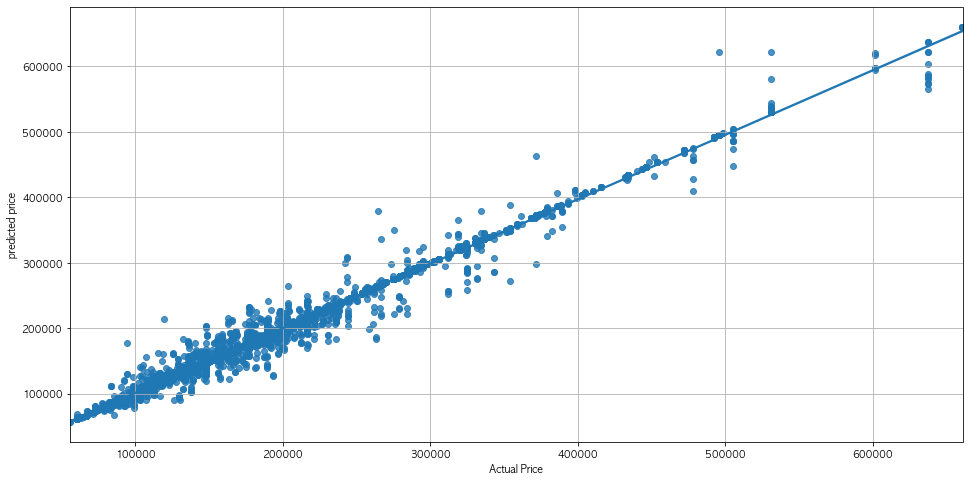

In [56]:
#실제값과 예측값 scatterplot
plt.figure(figsize=(16,8))
sns.regplot(y_test,pred_test,fit_reg=True)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.grid()
plt.show();

In [60]:
# K-Fold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

kfold =KFold(n_splits=5)
rf_cv = RandomForestRegressor()

# k-fold=5로 rmse값 보기
cv_rmse = []
for train_idx, test_idx in kfold.split(x):
    x_train_cv, x_test_cv = x.iloc[train_idx], x.iloc[test_idx] 
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    rf_cv.fit(x_train_cv,y_train_cv)
    pred_cv = rf_cv.predict(x_test_cv) 
    
    cv_rmse.append(np.sqrt(mean_squared_error(y_test_cv,pred_cv)))
    
print("cv_rmse : ", cv_rmse, end="\n")
print("cv_rmse_avg :",np.mean(cv_rmse))

cv_rmse :  [13687.731770219649, 25403.86869410418, 34925.20570628278, 23189.321797799726, 29927.510823448407]
cv_rmse_avg : 25426.727758370947


###  아쉬운점 및 배운점

- 여러가지 방식으로 데이터를 전처리를 시도하여 RMSE값을 10000이하로 낮춰보고자 했으나 잘 되지 않아 아쉬움이 크다.
- 차량의 렌트가격은 차량 자체의 가격으로부터 절대적인 영향을 받는다는 사실을 알게 됨.
- 모델의 성능을 높이기 위해 분석가로서 데이터셋의 비정상적인 수치를 아웃라이어라고 과감히 판단하는 결정이 어렵다는 점과 판단의 근거가 얼마나 중요한 지 깨닫게 됨